# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [211]:
# Import all libraries needed here:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb


## Read your dataset

In [212]:
data = pd.read_csv (r'C:\Users\brody\Machine Learning\DataSets\cancer patient data sets.csv')
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [213]:
le = LabelEncoder()
df2 = data
df2['Level']= le.fit_transform(df2['Level']) 
df2.drop (columns= ['Patient Id'], axis=0, inplace=True)

df2.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


## Check for missing values

In [214]:
print(df2.isnull().sum()) 
df2.dropna(inplace=True)


index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


## Check for outliers:

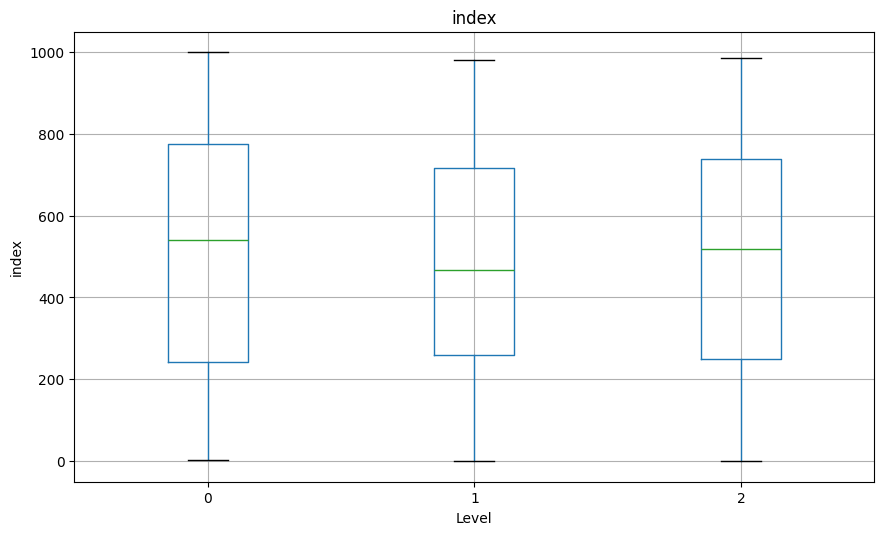

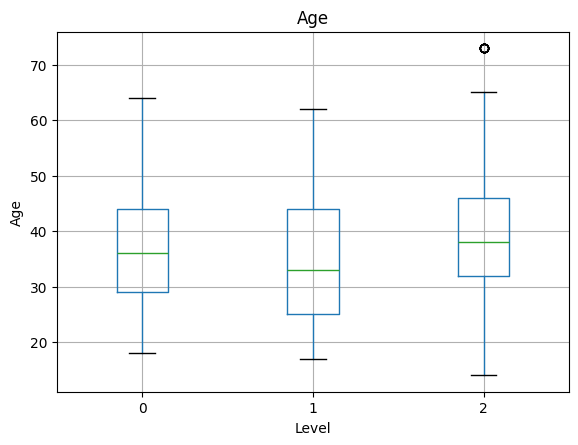

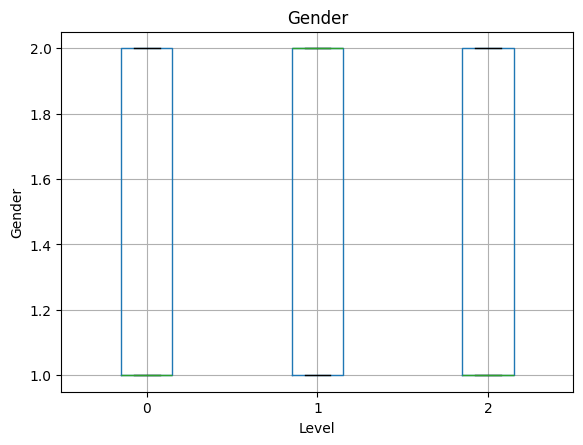

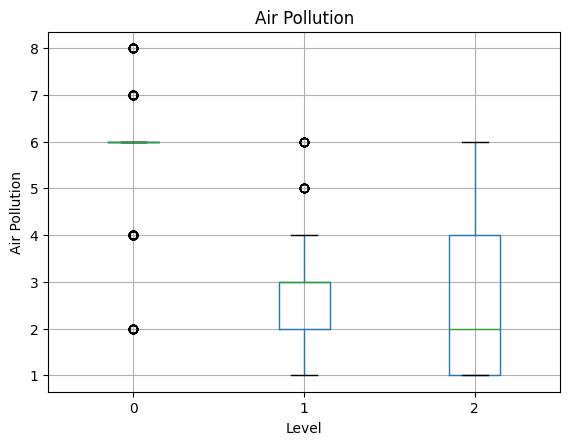

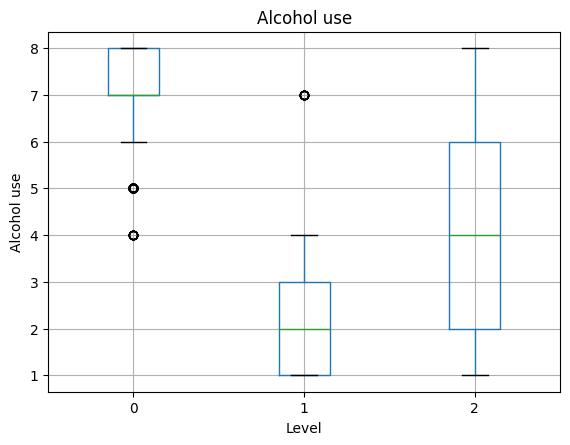

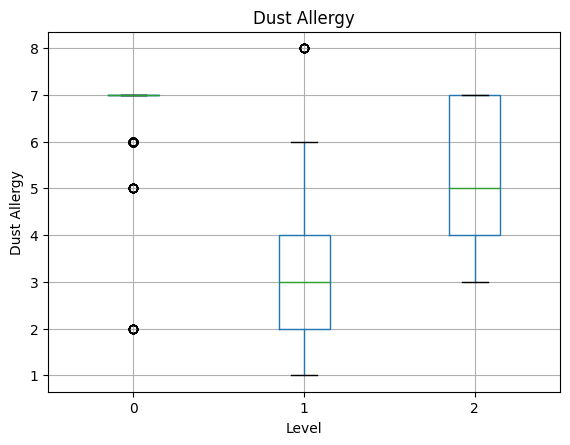

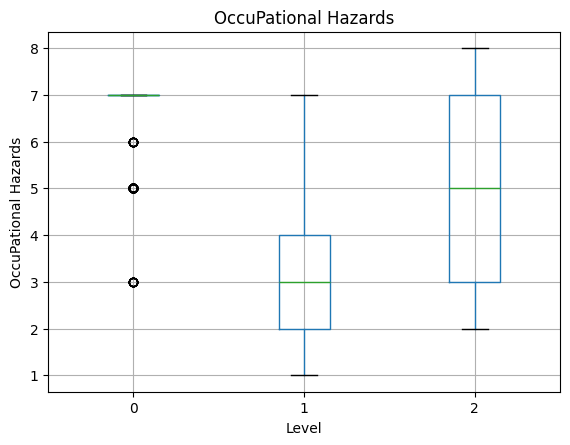

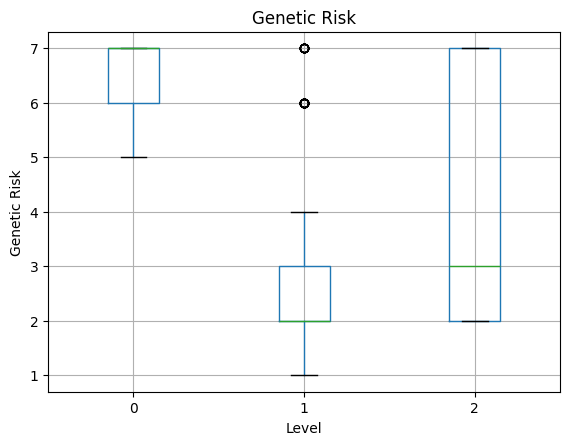

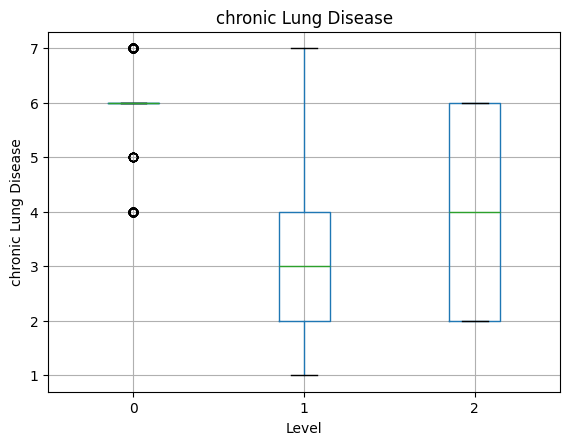

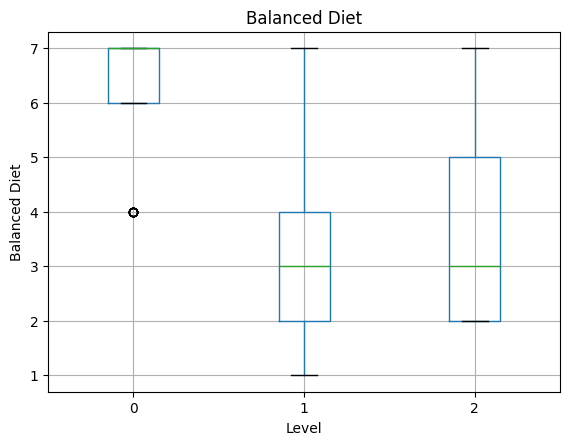

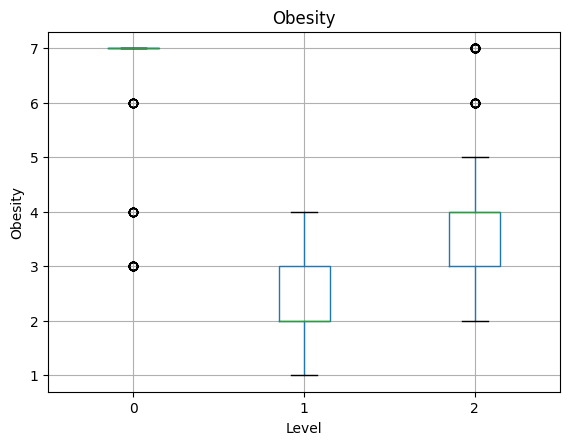

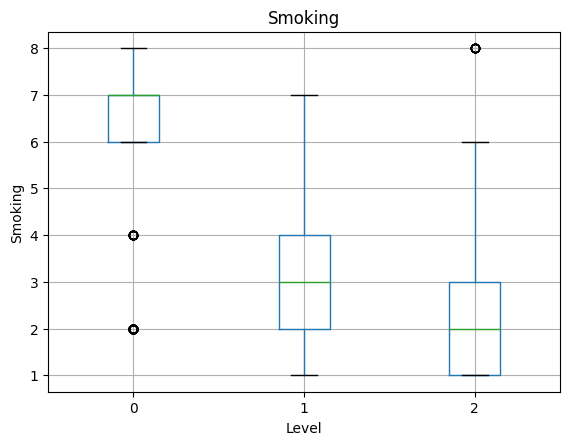

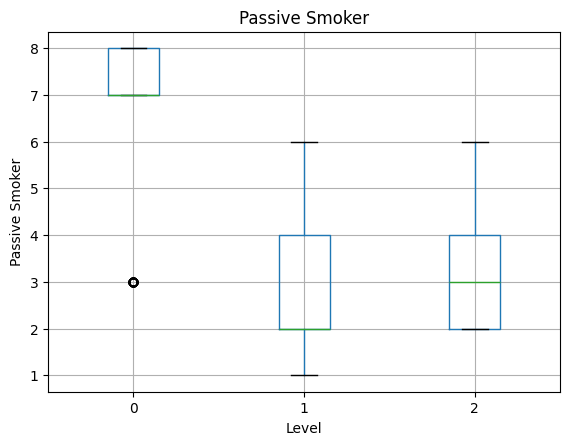

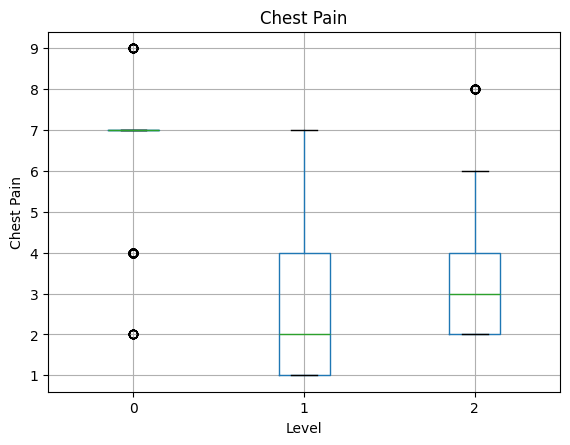

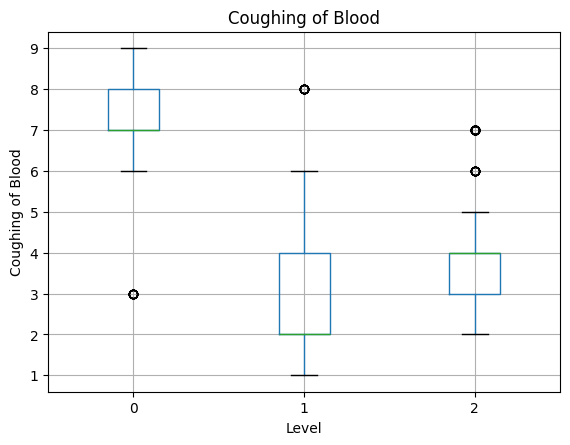

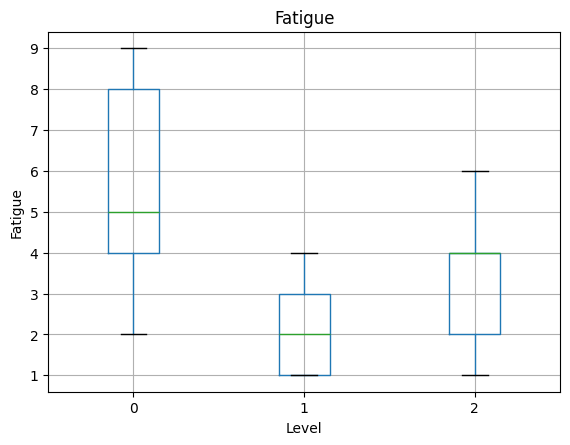

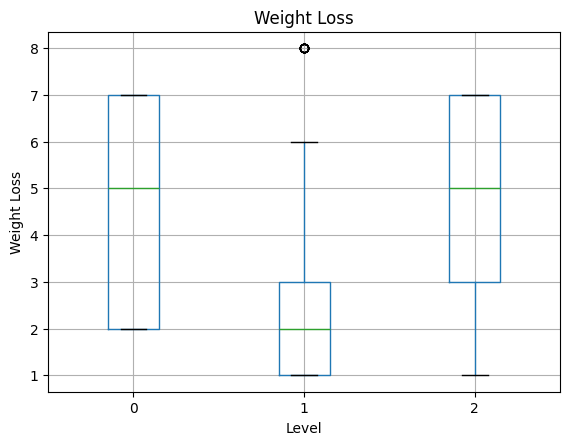

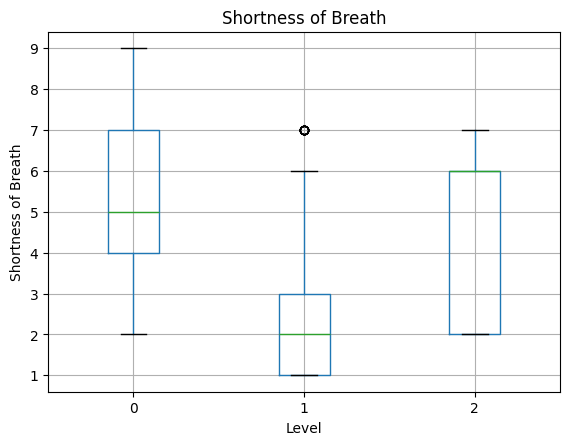

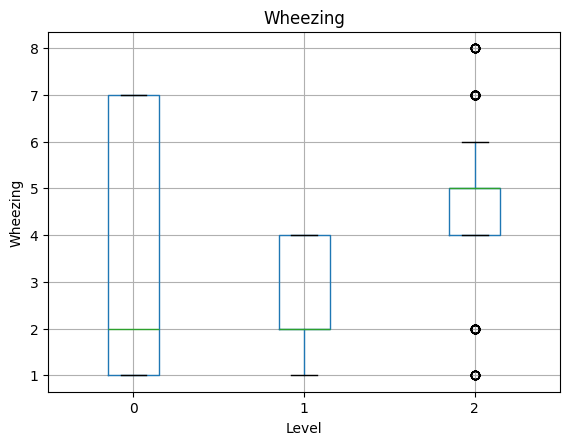

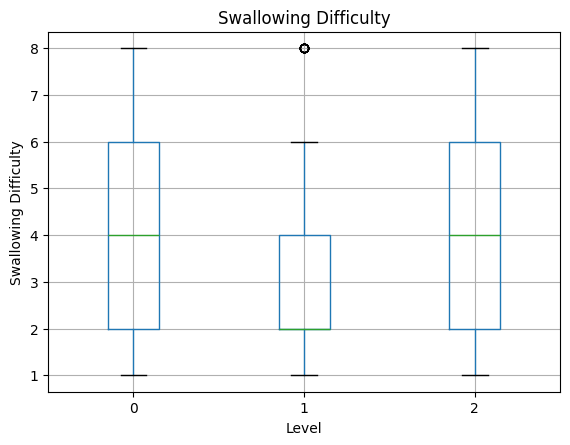

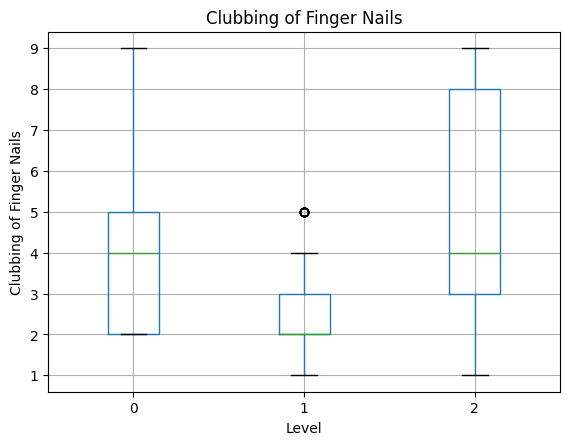

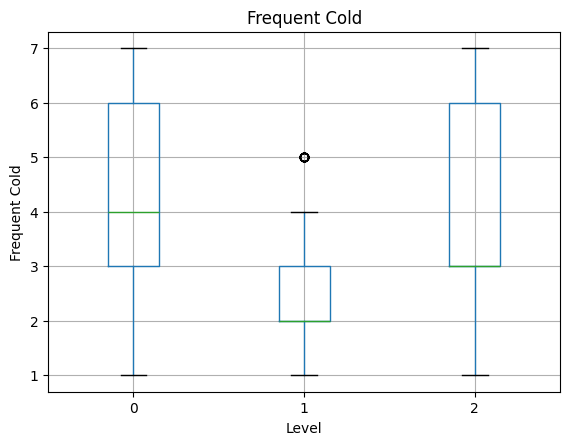

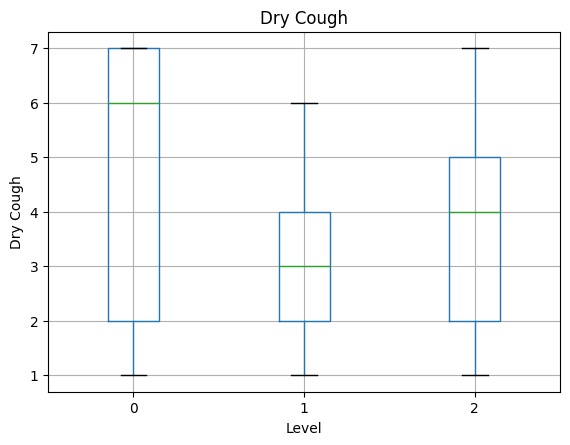

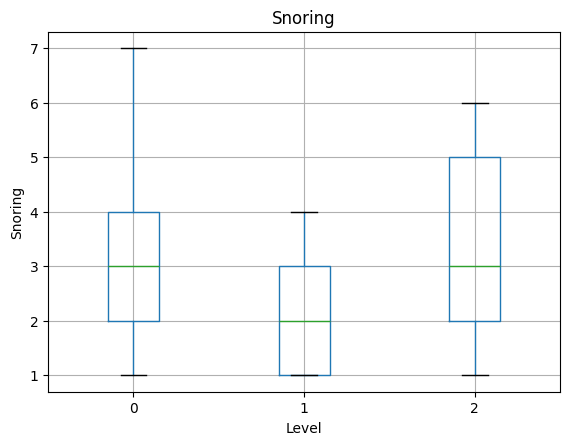

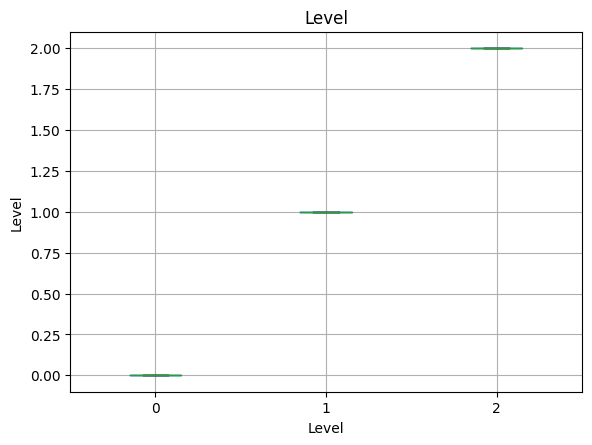

In [215]:

plt.figure(figsize=(10, 6))
for col in df2.select_dtypes(include='number').columns:
    df2.boxplot(column=col, by='Level', ax=plt.gca())
    plt.title(col)
    plt.suptitle('')
    plt.xlabel('Level')
    plt.ylabel(col)
    plt.show()

## Data Scaling:

In [216]:

scaler = StandardScaler ()
df2[['Level']] = scaler.fit_transform (df2[['Level']])

## Extract features X and target y from the dataset:

In [217]:
df2['Level'] = df2['Level'].astype(int)

X = df2.drop('Level', axis=1)
y = df2['Level']

## Split X and y into X_train, X_test, y_train, y_test

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

df2.dtypes

index                       int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int32
dtype: object

## KNN:
Use KNN and find the best K-neighbor value:

In [219]:
loss_hist=[]
scores = []
for k in range(1, 41, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    loss_hist.append(score)
    scores.append(score)
m = max (scores)
print('max accuracy: ', m, ' for k=', scores.index(m))

k=1, accuracy=83.00%
k=3, accuracy=82.00%
k=5, accuracy=82.00%
k=7, accuracy=81.50%
k=9, accuracy=81.00%
k=11, accuracy=80.00%
k=13, accuracy=79.50%
k=15, accuracy=78.50%
k=17, accuracy=78.00%
k=19, accuracy=77.50%
k=21, accuracy=78.50%
k=23, accuracy=78.50%
k=25, accuracy=79.00%
k=27, accuracy=80.00%
k=29, accuracy=79.50%
k=31, accuracy=77.00%
k=33, accuracy=74.50%
k=35, accuracy=72.00%
k=37, accuracy=71.50%
k=39, accuracy=70.50%
max accuracy:  0.83  for k= 0


## Decision Tree
Use decision tree and find the best max depth value:

In [220]:
model = KNeighborsClassifier (n_neighbors=5, algorithm='kd_tree',
leaf_size=30, p=2, metric='minkowski')
model.fit (X_train, y_train)
y_pred = model.predict (X_test)
print ('Train score = ', accuracy_score (y_pred, y_test))

Train score =  0.82


## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [221]:
X, y = make_classification(n_samples=1000, n_features=24, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier (max_depth=2, random_state=0)
clf.fit(X, y)
y_pred = clf.predict (X_test)
print (accuracy_score(y_pred, y_test))

0.935


## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [222]:
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)
sample_input = [[0, 0, 0, 0]]
prediction = clf.predict(sample_input)
print("Prediction for sample input:", prediction)
y_pred = clf.predict (X_test)
# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Evaluate accuracy on the entire dataset (including test set)
accuracy_full_dataset = clf.score(X, y)
print("Accuracy on full dataset:", accuracy_full_dataset)



Prediction for sample input: [1]
Accuracy on test set: 0.92
Accuracy on full dataset: 0.963


## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost



In [223]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.925
